# Assignment 1: Image Manipulation and Canny Edge Detection

---

Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

In this notebook, we practice some basic image manipulation techniques in OpenCV including Canny edge detection. These are the foundation of later computer vision applications.

In [43]:
# install required packages specified in pipfile
!pipenv install

Installing dependencies from Pipfile.lock (fd2ab2)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.


In [44]:
# imports
from matplotlib import pyplot as plt
%matplotlib inline
import copy

import numpy as np 
import cv2

Task 1: Basic Image Manipulation in OpenCV
=

**TODO**: 1a) Load a color image of your choice, preferably a picture you took yourself. Convert it to a color format of your choice, and display it. **(1.5 points)**

Image size: 27433728
Image shape: (4032, 2268, 3)
Data type: uint8


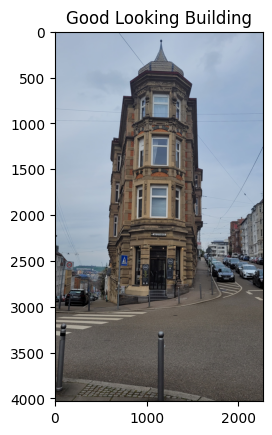

In [103]:
##### TODO: YOUR CODE GOES HERE

input_img = cv2.imread ('.\\building.jpg', 1)  
input_second_img = cv2.imread ('.\\image.jpg', 1) 

img_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
img_RGB_2 = cv2.cvtColor(input_second_img, cv2.COLOR_BGR2RGB)


plt.title("Good Looking Building")
plt.imshow(img_RGB)

print(f"Image size: {img_RGB.size}")
print(f"Image shape: {img_RGB.shape}")
print(f"Data type: {img_RGB.dtype}")

**TODO**: 1b) Color the 10th pixel row of the image in red. Plot the upper left 500x500 pixel image cutout to verify your result. **(2 points)** 

Hint: Indexing starts at 0 in Python! Remember the image origin is in the upper left image corner.

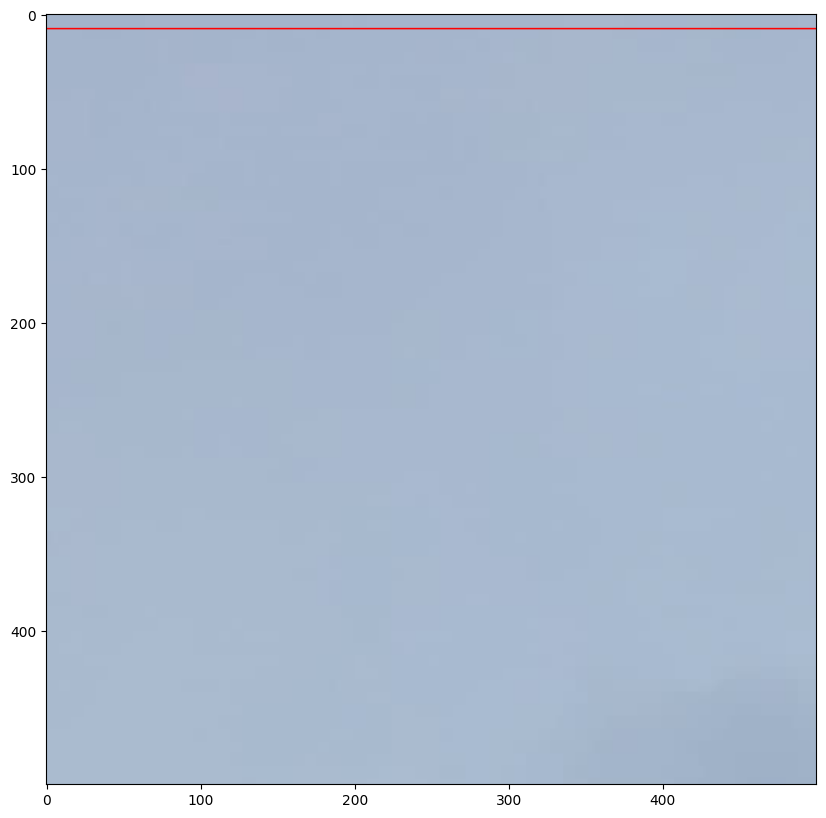

In [104]:
##### TODO: YOUR CODE GOES HERE
img_RGB[9, :] = [255, 0, 0] 
img_cutout = img_RGB[:500, :500]

plt.figure(figsize = (10,10))
plt.imshow(img_cutout)

**TODO**: 1c) Print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row. **(2 points)** 

In [105]:
##### TODO: YOUR CODE GOES HERE
print(f"Rightmost on 9th row: {img_RGB[8, -1]}")
print(f"Leftmost on 10th row: {img_RGB[9, 0]}")

Rightmost on 9th row: [167 182 203]
Leftmost on 10th row: [255   0   0]


**TODO**: 1d) Flatten the image, i.e., convert it from the 3D array to a 1D array. Find at least two different commands that achieve the desired result. Check your output with `shape`. **(3 points)**

In [106]:
##### TODO: YOUR CODE GOES HERE
img_RGB_flatten_first = img_RGB.reshape(-1)
print(f"Flatten shape: {img_RGB_flatten_first.shape}")

img_RGB_flatten_second = img_RGB.flatten()
print(f"Flatten shape: {img_RGB_flatten_second.shape}")

Flatten shape: (27433728,)
Flatten shape: (27433728,)


**TODO**: 1e) As before, print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row, but use the flattened image now. Verify that the result is the same as before. **(2 points)**

In [107]:
##### TODO: YOUR CODE GOES HERE
red_pixel_rightmost = img_RGB_flatten_first[(9 * img_RGB.shape[1] - 1)  * 3]
blue_pixel_rightmost = img_RGB_flatten_first[(9 * img_RGB.shape[1] - 1)  * 3 + 1]
green_pixel_rightmost = img_RGB_flatten_first[(9 * img_RGB.shape[1] - 1)  * 3 + 2]
pixel_rightmost = [red_pixel_rightmost, blue_pixel_rightmost, green_pixel_rightmost]

red_pixel_leftmost = img_RGB_flatten_first[9 * img_RGB.shape[1]  * 3]
blue_pixel_leftmost = img_RGB_flatten_first[9 * img_RGB.shape[1]  * 3 + 1]
green_pixel_leftmost = img_RGB_flatten_first[9 * img_RGB.shape[1]  * 3 + 2]
pixel_leftmost = [red_pixel_leftmost, blue_pixel_leftmost, green_pixel_leftmost]

print(f"Rightmost on 9th row: {pixel_rightmost}\nLeftmost on 10th row: {pixel_leftmost}") 


Rightmost on 9th row: [167, 182, 203]
Leftmost on 10th row: [255, 0, 0]


**TODO**: 1f) Split the three color channels and display them separately. Can you see from the plotted images which color channel is displayed in which image (without looking at the code), or do the three channels not differ much? Write your answer in the markdown cell below the code. **(2 points)**

Text(0.5, 1.0, 'blue')

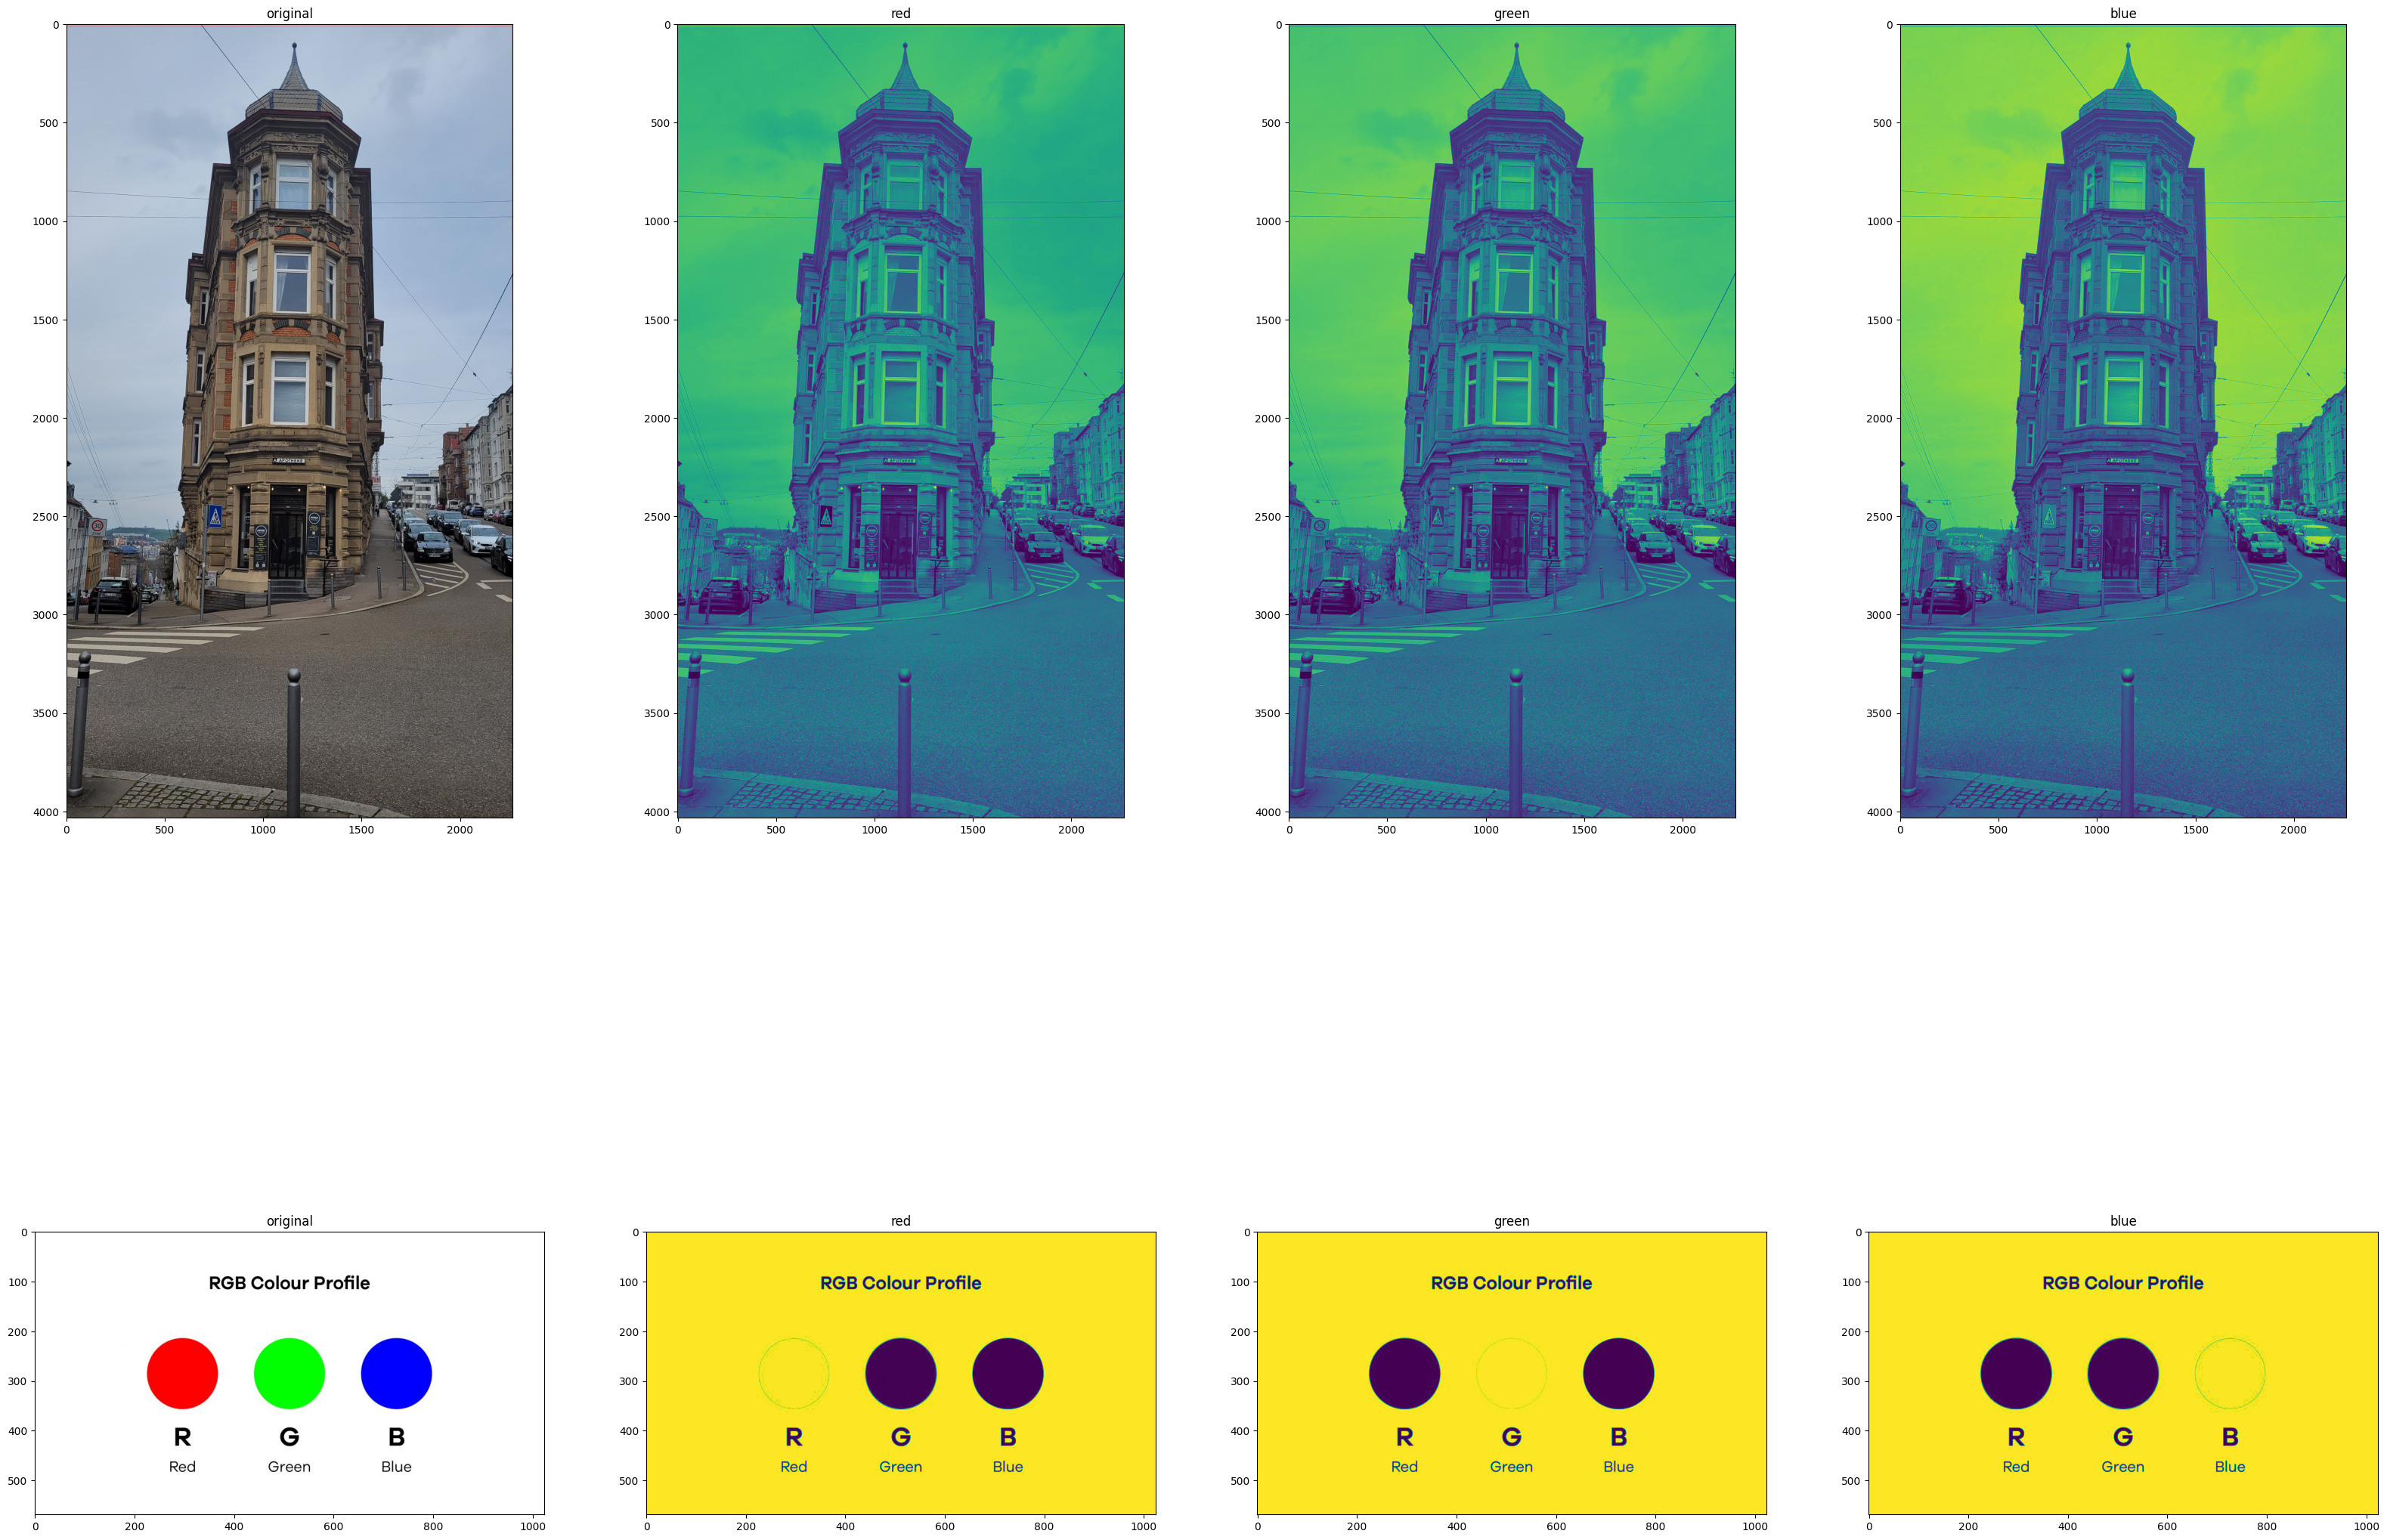

In [108]:
##### TODO: YOUR CODE GOES HERE
r1, g1, b1 = cv2.split(img_RGB)
r2, g2, b2 = cv2.split(img_RGB_2)


fig, ((ax0, ax1, ax2, ax3),(ax4, ax5, ax6, ax7)) = plt.subplots(2, 4, figsize=(40, 30))

ax0.imshow(img_RGB)
ax0.set_title('original')
ax1.imshow(r1) 
ax1.set_title('red')
ax2.imshow(g1) 
ax2.set_title('green')
ax3.imshow(b1) 
ax3.set_title('blue')

ax4.imshow(img_RGB_2)
ax4.set_title('original')
ax5.imshow(r2) 
ax5.set_title('red')
ax6.imshow(g2) 
ax6.set_title('green')
ax7.imshow(b2) 
ax7.set_title('blue')



**YOUR ANSWER**: We are filtering using a scale that goes from purple to yellow, purple is the minimum and yellow is the maximum value. When we are looking for red we found out that red has best correlation with inself and it's getting maximum value (yellow). The other two channel are getting to min value (purple). In building picture you can see sky is brighter (more yellow) in blue layer and pedestrian sign is darker in red layer.

Task 2: Edge Detection
=

**TODO**: 2a) Choose a part of the image that you find interesting for later corner and edge detection. Store the cutout in a new grayscale image. **(1 point)**

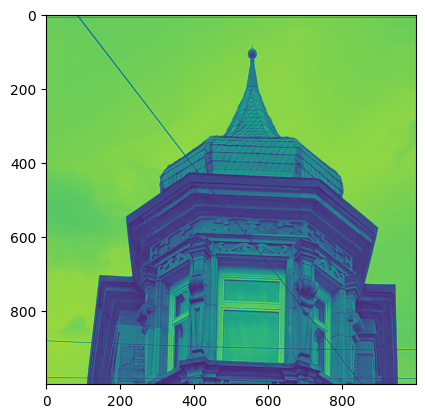

In [174]:
##### TODO: YOUR CODE GOES HERE
some_part_image = img_RGB[0:1000, 600:1600]

img_gray = cv2.cvtColor(some_part_image, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)

**TODO**: 2b) Find a part of the cutout that you think might be difficult to detect edges in with Canny. Mark this part in the grayscale cutout with a red square. Write a short explanation why this could be difficult below. **(2 points)**

Hint: Note that you cannot plot color into a grayscale image. One option is to convert the grayscale image to RGB first, using `COLOR_GRAY2RGB`.

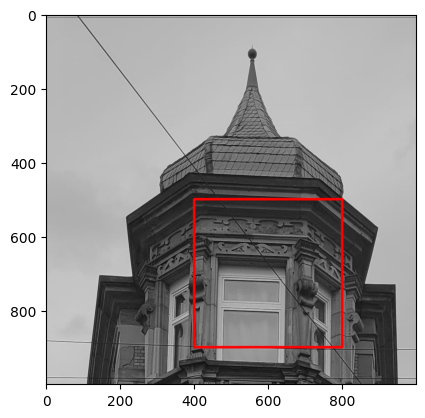

In [175]:
##### TODO: YOUR CODE GOES HERE
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)

img_gray_selected = copy.deepcopy(img_gray)

img_gray_selected = cv2.rectangle(img_gray_selected, pt1=(400, 500), pt2=(800, 900), color=(255, 0, 0), thickness=5)

plt.imshow(img_gray_selected)

**YOUR ANSWER**: Because there are a lot of details in as more region, they are not well-defined and their RGB values are close one to each other. Because of the color closeness of the neighbor parts the gradients would be closer and edge detection will be harder. 

**TODO**: 2c) Resize the gray cutout to 1/4th of the original size, keeping the aspect ratio. Plot both grayscale images next to each other using Matplotlib's `subplots`.

Text(0.5, 1.0, 'resized gray scale')

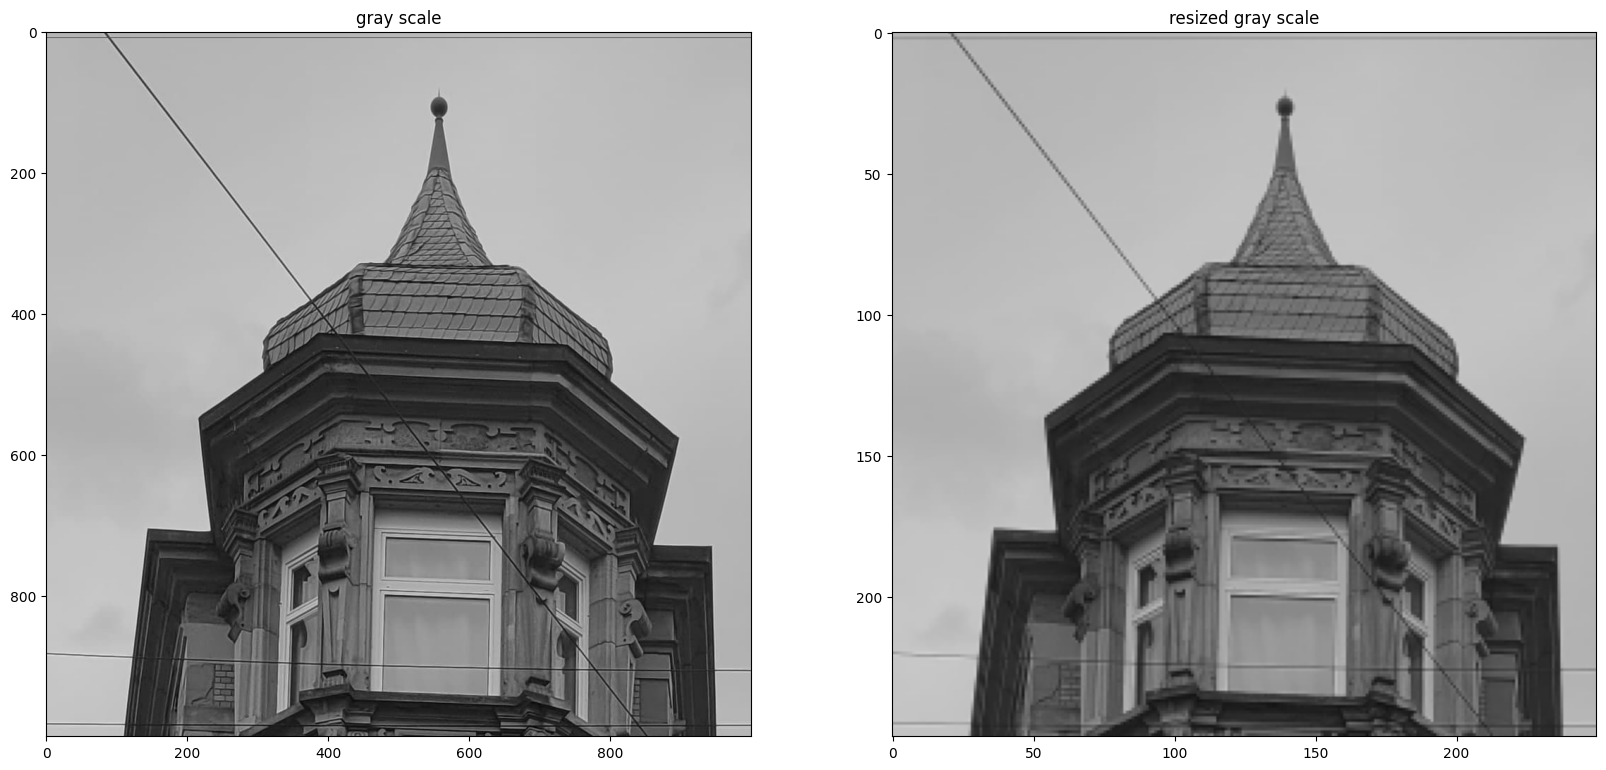

In [179]:
##### TODO: YOUR CODE GOES HERE
resized_gray_img = cv2.resize(img_gray, (250, 250), interpolation = cv2.INTER_AREA)

fig, (ax_0, ax_1) = plt.subplots(1, 2, figsize=(20, 20))

ax_0.imshow(img_gray)
ax_0.set_title('gray scale')
ax_1.imshow(resized_gray_img)
ax_1.set_title('resized gray scale')

**TODO**: 2d) Apply Gaussian blur with a kernel of size 9 to the resized image and plot the result. **(1 point)**

Text(0.5, 1.0, 'Gaussian Blur')

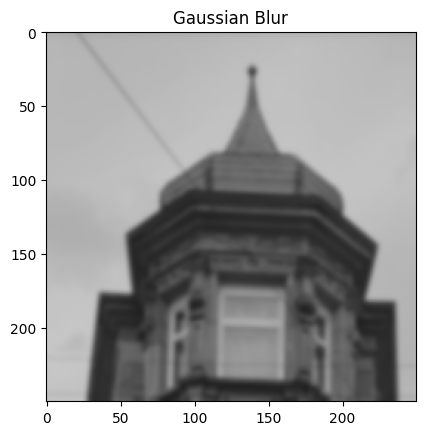

In [177]:
##### TODO: YOUR CODE GOES HERE
blur = cv2.GaussianBlur(resized_gray_img, (9, 9), 0)

plt.imshow(blur)
plt.title("Gaussian Blur")


**TODO**: 2e) Detect the edges in the blurred cutout using Canny edge detector. Adapt the Canny thresholds for an optimal result. Plot the edges in blue into the grayscale cutout. **(3 points)** 

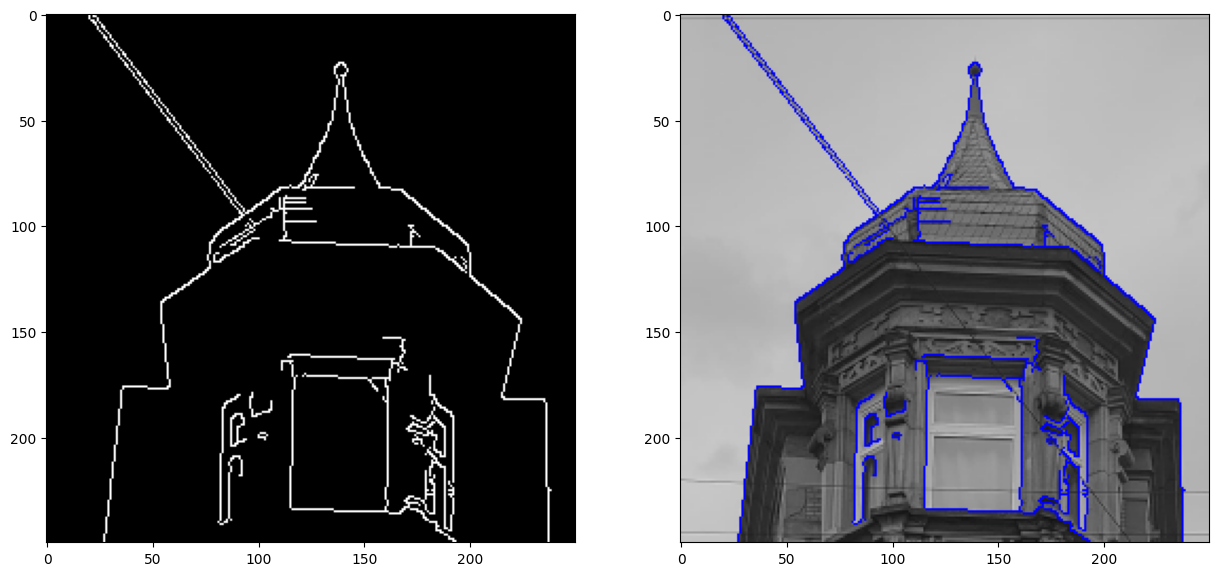

In [178]:
##### TODO: YOUR CODE GOES HERE
# parameters for Canny
th1 = 155
th2 = th1 * 2.85 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...

# convert to grayscale
gray = cv2.cvtColor(resized_gray_img, cv2.COLOR_RGB2GRAY)

# apply Canny edge detection
edge = cv2.Canny(gray, th1, th2)

# plot result
resized_gray_img[edge != 0] = (0, 0, 255) # this takes pixels in edgeresult where edge non-zero colours them bright green
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 30))
ax1.imshow(edge, cmap='gray')
ax2.imshow(resized_gray_img)

**TODO**: 2f) Check if your prediction of difficulty was correct. Do you see a) real edges that were missed by Canny (false negatives) or b) detected edges that are not there in reality (false positives)? Try to experiment with the Canny thresholds and solve these difficulties. How did you try to solve the difficulties? Write your answer below the code. **(1.5 points)**

**YOUR ANSWER**: a) The Canny missed the center of the window but other ones look good in general. b) Two small detail in decoration counted as an edge but in reality these are not counted as an edge. We tried lots of different thresholds and we found these are optimal ones. To get rid of small details we increse threshold 1 and we played with threshold 2 to prevent lose bigger edges.

Well done, you are now able to apply basic image manipulation techniques as well as Canny edge detection to images in OpenCV! 

Task 3: Theory Questions
=

**TODO**: 3a) What is the problem of applying image derivatives for edge detection in noisy images? What is a possible solution to that problem? Can you give an example in which you often get noise when taking a photo? **(3 points)**

**YOUR ANSWER**: 

**TODO**: 3b) You are given a 3×3 pixel input image $
\begin{array}{|ccc|}
\hline
 1 & 2 & 3  \\ 
 4 & 5 & 6  \\ 
 7 & 8 & 9  \\ 
\hline   
\end{array}$
and a 3×3 pixel filter $\begin{array}{|ccc|}
\hline
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
\hline   
\end{array}$. Compute the 3 × 3 pixel result image of the correlation of the filter with the input image. All pixels outside the input image are padded with zeros. **(4.5 points)**

**YOUR ANSWER**: 


**TODO**: 3c) What patterns does this special filter respond to? How can you see this in the result from 3b)? **(2 points)**

**YOUR ANSWER**: 

**TODO**: 3d) Please calculate the result using the settings from task 3b), but with convolution instead of correlation. **(4.5 points)**

**YOUR ANSWER**: 
